In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
from spacy.tokens import span

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('cyberbullying_tweets.csv')

In [6]:
import nltk

In [7]:
import re
import numpy as np
df.tweet_text=df.tweet_text.str.replace("@\w*", " ")

C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\261453544.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tweet_text=df.tweet_text.str.replace("@\w*", " ")


In [8]:
df.tweet_text=df.tweet_text.str.replace("[^a-zA-Z]", " ")

C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\2636496267.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tweet_text=df.tweet_text.str.replace("[^a-zA-Z]", " ")


In [9]:
df.head()

tweet_text cyberbullying_type
0  In other words  katandandre  your food was cra...  not_cyberbullying
1  Why is  aussietv so white   MKR  theblock  ImA...  not_cyberbullying
2       a classy whore  Or more red velvet cupcakes   not_cyberbullying
3    meh   P  thanks for the heads up  but not to...  not_cyberbullying
4    This is an ISIS account pretending to be a K...  not_cyberbullying

In [10]:
nltk.word_tokenize(df['tweet_text'][0])

['In',
 'other',
 'words',
 'katandandre',
 'your',
 'food',
 'was',
 'crapilicious',
 'mkr']

In [11]:
from nltk.corpus import stopwords

In [12]:
stop_word = set(stopwords.words('English'))

In [13]:
df.apply(lambda x: x.astype(str).str.lower())

tweet_text cyberbullying_type
0      in other words  katandandre  your food was cra...  not_cyberbullying
1      why is  aussietv so white   mkr  theblock  ima...  not_cyberbullying
2           a classy whore  or more red velvet cupcakes   not_cyberbullying
3        meh   p  thanks for the heads up  but not to...  not_cyberbullying
4        this is an isis account pretending to be a k...  not_cyberbullying
...                                                  ...                ...
47687  black ppl aren t expected to do anything  depe...          ethnicity
47688  turner did not withhold his disappointment  tu...          ethnicity
47689  i swear to god  this dumb nigger bitch  i have...          ethnicity
47690  yea fuck you rt    if youre a nigger fucking u...          ethnicity
47691  bro  u gotta chill rt    dog fuck kp that dumb...          ethnicity

[47692 rows x 2 columns]

In [14]:
df['tweet_text'].str.split()

0        [In, other, words, katandandre, your, food, wa...
1        [Why, is, aussietv, so, white, MKR, theblock, ...
2        [a, classy, whore, Or, more, red, velvet, cupc...
3        [meh, P, thanks, for, the, heads, up, but, not...
4        [This, is, an, ISIS, account, pretending, to, ...
                               ...                        
47687    [Black, ppl, aren, t, expected, to, do, anythi...
47688    [Turner, did, not, withhold, his, disappointme...
47689    [I, swear, to, God, This, dumb, nigger, bitch,...
47690    [Yea, fuck, you, RT, IF, YOURE, A, NIGGER, FUC...
47691    [Bro, U, gotta, chill, RT, Dog, FUCK, KP, that...
Name: tweet_text, Length: 47692, dtype: object

In [15]:
df['tweettext'] = df['tweet_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))

In [16]:
del df['tweet_text']

In [17]:
del df ['cyberbullying_type']

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [19]:
df['scores']= df['tweettext'].apply(lambda tweettext: sid.polarity_scores(tweettext))

In [20]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['cyberbullying_possibilities'] = df['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
df.head()

tweettext  \
0         In words katandandre food crapilicious mkr   
1  Why aussietv white MKR theblock ImACelebrityAU...   
2                classy whore Or red velvet cupcakes   
3  meh P thanks heads concerned another angry dud...   
4  This ISIS account pretending Kurdish account L...   

                                              scores  compound  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2  {'neg': 0.384, 'neu': 0.357, 'pos': 0.259, 'co...   -0.3400   
3  {'neg': 0.368, 'neu': 0.4, 'pos': 0.232, 'comp...   -0.1779   
4  {'neg': 0.22, 'neu': 0.472, 'pos': 0.307, 'com...    0.0258   

  cyberbullying_possibilities  
0                         pos  
1                         pos  
2                         neg  
3                         neg  
4                         pos

In [21]:
import lime
import sklearn
import numpy as np
from __future__ import print_function
import sklearn
import sklearn.ensemble
import sklearn.metrics

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from sklearn import metrics

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df['tweettext'], df['cyberbullying_possibilities'], test_size=0.2,random_state=42)


In [26]:
import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
top_words = 50000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(x_train)
list_tokenized_train = tokenizer.texts_to_sequences(x_train)

max_review_length = 130
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)

In [27]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           1600032   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,653,333
Trainable params: 1,653,333
Non-trainable params: 0
_________________________________________________________________


In [28]:
Cyberbullying_type = {'pos':1, 'neg':0}
df['cyberbullying_type']=[Cyberbullying_type[item] for item in df.cyberbullying_possibilities]
print(df.cyberbullying_type)

0        1
1        1
2        0
3        0
4        1
        ..
47687    1
47688    0
47689    0
47690    0
47691    0
Name: cyberbullying_type, Length: 47692, dtype: int64


In [29]:
df.head()

tweettext  \
0         In words katandandre food crapilicious mkr   
1  Why aussietv white MKR theblock ImACelebrityAU...   
2                classy whore Or red velvet cupcakes   
3  meh P thanks heads concerned another angry dud...   
4  This ISIS account pretending Kurdish account L...   

                                              scores  compound  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2  {'neg': 0.384, 'neu': 0.357, 'pos': 0.259, 'co...   -0.3400   
3  {'neg': 0.368, 'neu': 0.4, 'pos': 0.232, 'comp...   -0.1779   
4  {'neg': 0.22, 'neu': 0.472, 'pos': 0.307, 'com...    0.0258   

  cyberbullying_possibilities  cyberbullying_type  
0                         pos                   1  
1                         pos                   1  
2                         neg                   0  
3                         neg                   0  
4                         pos                   1

In [30]:
df['cyberbullyingtype']= np.where(df['cyberbullying_type'] == 1, 'NonCyberbullying', 'Cyberbullying')
df.head()

tweettext  \
0         In words katandandre food crapilicious mkr   
1  Why aussietv white MKR theblock ImACelebrityAU...   
2                classy whore Or red velvet cupcakes   
3  meh P thanks heads concerned another angry dud...   
4  This ISIS account pretending Kurdish account L...   

                                              scores  compound  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2  {'neg': 0.384, 'neu': 0.357, 'pos': 0.259, 'co...   -0.3400   
3  {'neg': 0.368, 'neu': 0.4, 'pos': 0.232, 'comp...   -0.1779   
4  {'neg': 0.22, 'neu': 0.472, 'pos': 0.307, 'com...    0.0258   

  cyberbullying_possibilities  cyberbullying_type cyberbullyingtype  
0                         pos                   1  NonCyberbullying  
1                         pos                   1  NonCyberbullying  
2                         neg                   0     Cyberbullying  
3                         neg                   0     Cyberbullying  
4                         pos                   1  NonCyberbullying

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df['tweettext'], df['cyberbullyingtype'], test_size=0.2,random_state=42)


In [32]:
top_words = 50000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(x_train)
list_tokenized_train = tokenizer.texts_to_sequences(x_train)

max_review_length = 130
x_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)

In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['cyberbullyingtype']= lb.fit_transform(df['cyberbullyingtype'])

In [34]:
x = df['tweettext']
y = df['cyberbullyingtype']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [36]:
top_words = 50000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(x_train)
list_tokenized_train = tokenizer.texts_to_sequences(x_train)

max_review_length = 130
x_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)

In [37]:
model.fit(x_train,y_train, epochs=20, batch_size=64)

Epoch 1/20
597/597 [==============================] - 93s 152ms/step - loss: 0.3815 - accuracy: 0.8307
Epoch 2/20
597/597 [==============================] - 97s 162ms/step - loss: 0.1654 - accuracy: 0.9413
Epoch 3/20
597/597 [==============================] - 99s 166ms/step - loss: 0.0995 - accuracy: 0.9683
Epoch 4/20
597/597 [==============================] - 94s 157ms/step - loss: 0.0721 - accuracy: 0.9782
Epoch 5/20
597/597 [==============================] - 96s 162ms/step - loss: 0.0519 - accuracy: 0.9847
Epoch 6/20
597/597 [==============================] - 87s 146ms/step - loss: 0.0400 - accuracy: 0.9879
Epoch 7/20
597/597 [==============================] - 89s 149ms/step - loss: 0.0279 - accuracy: 0.9917
Epoch 8/20
597/597 [==============================] - 95s 159ms/step - loss: 0.0234 - accuracy: 0.9922
Epoch 9/20
597/597 [==============================] - 121s 202ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 10/20
597/597 [==============================] - 109s 182ms/step -

In [38]:
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)

In [39]:
prediction = model.predict(x_test)

299/299 [==============================] - 9s 26ms/step


In [40]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,classification_report

In [41]:
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.8892965719677115
F1-score:  0.8607962035328237
Confusion matrix:


array([[5218,  632],
       [ 424, 3265]], dtype=int64)

In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.89      0.92      0.91      5642
        True       0.89      0.84      0.86      3897

    accuracy                           0.89      9539
   macro avg       0.89      0.88      0.88      9539
weighted avg       0.89      0.89      0.89      9539



In [43]:
from lime.lime_text import LimeTextExplainer
class_names = ['cyberbullying', 'noncyberbullying']
explainer = LimeTextExplainer(class_names=class_names)

In [44]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
from nltk.tokenize import TweetTokenizer
import re
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
lemmatizer = WordNetLemmatizer()

def process_text(text):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    #text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    #text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    #text = re.sub(r'#', '', text)
    text = str(re.sub("\S*\d\S*", "", text).strip()) 
    text=decontract(text)
    #df.tweettext=df.tweettext.str.replace("@\w*", " ")
    #df.tweettext=df.tweettext.str.replace("[^a-zA-Z]", " ")
    # tokenize texts
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                              reduce_len=True)
    tokens = tokenizer.tokenize(text)
    #stop_word = set(stopwords.words('English'))
    #df.apply(lambda x: x.astype(str).str.lower())
    #df['tweettext'] = df['tweettext'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))
    texts_clean = []
    for word in tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation+'...'):  # remove punctuation
             
            stem_word = lemmatizer.lemmatize(word,"v")  # Lemmatizing word
            texts_clean.append(stem_word)

    return " ".join(texts_clean)
df['tweettext']=df['tweettext'].apply(lambda x: process_text(str(x)))
def predict_prob(arr):
    processed = []
    for i in arr:
         processed.append(process_text(i))
    list_tokenized_ex = tokenizer.texts_to_sequences(processed)
    Ex = pad_sequences(list_tokenized_ex, maxlen= max_review_length)
    pred = model.predict(Ex)
    returnable = []
    for i in pred:
        temp = i[0]
        returnable.append(np.array([1-temp, temp]))
    return np.array(returnable)

        

In [45]:
explainer.explain_instance(df['tweettext'][7954],predict_prob).show_in_notebook(text=True)

157/157 [==============================] - 4s 25ms/step


In [46]:
df2 = pd.read_csv('cyberbullyingtweetsc1.csv')

In [47]:
df2.tweet_text=df2.Tweet_text.str.replace("@\w*", " ")
df2.tweet_text=df2.Tweet_text.str.replace("[^a-zA-Z]", " ")

C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\527626537.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.tweet_text=df2.Tweet_text.str.replace("@\w*", " ")
C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\527626537.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.tweet_text=df2.Tweet_text.str.replace("@\w*", " ")
C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\527626537.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.tweet_text=df2.Tweet_text.str.replace("[^a-zA-Z]", " ")


In [48]:
df2.head()

Tweet_text Cyberbullying_type
0  rape is real..zvasiyana nema jokes about being...             gender
1  You never saw any celebrity say anything like ...             gender
2  @ManhattaKnight I mean he's gay, but he uses g...             gender
3  RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...             gender
4  Rape is rape. And the fact that I read one pos...             gender

In [49]:
nltk.word_tokenize(df2['Tweet_text'][0])

['rape',
 'is',
 'real',
 '..',
 'zvasiyana',
 'nema',
 'jokes',
 'about',
 'being',
 'drunk',
 'or',
 'being',
 'gay',
 'or',
 'being',
 'lesbian',
 '...',
 'rape',
 'is',
 'not',
 'ones',
 'choice',
 'or',
 'wish',
 '..',
 'thtz',
 'where',
 'the',
 'sensitivity',
 'is',
 'coming',
 'from']

In [50]:
df2.apply(lambda x: x.astype(str).str.lower())

Tweet_text Cyberbullying_type
0      rape is real..zvasiyana nema jokes about being...             gender
1      you never saw any celebrity say anything like ...             gender
2      @manhattaknight i mean he's gay, but he uses g...             gender
3      rt @raul_novoa16: @aliciabernardez @alex_aim @...             gender
4      rape is rape. and the fact that i read one pos...             gender
...                                                  ...                ...
15966  can you imagine if christians came together li...           religion
15967  so how to support justice from the initial pro...           religion
15968  rt @trobinsonnewera: if you harbour any doubts...           religion
15969  @dankmtl @peacenothate_ one thing about muslim...           religion
15970  does the quran precludes women from human righ...           religion

[15971 rows x 2 columns]

In [51]:
df2['Tweet_text'].str.split()

0        [rape, is, real..zvasiyana, nema, jokes, about...
1        [You, never, saw, any, celebrity, say, anythin...
2        [@ManhattaKnight, I, mean, he's, gay,, but, he...
3        [RT, @Raul_Novoa16:, @AliciaBernardez, @Alex_A...
4        [Rape, is, rape., And, the, fact, that, I, rea...
                               ...                        
15966    [Can, you, imagine, if, Christians, came, toge...
15967    [So, how, to, support, justice, from, the, ini...
15968    [RT, @TRobinsonNewEra:, If, you, harbour, any,...
15969    [@dankmtl, @PeaceNotHate_, One, thing, about, ...
15970    [Does, the, Quran, precludes, women, from, hum...
Name: Tweet_text, Length: 15971, dtype: object

In [52]:
df2['tweettext'] = df2['Tweet_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))

## 

In [53]:
df2.head()

Tweet_text Cyberbullying_type  \
0  rape is real..zvasiyana nema jokes about being...             gender   
1  You never saw any celebrity say anything like ...             gender   
2  @ManhattaKnight I mean he's gay, but he uses g...             gender   
3  RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...             gender   
4  Rape is rape. And the fact that I read one pos...             gender   

                                           tweettext  
0  rape real..zvasiyana nema jokes drunk gay lesb...  
1  You never saw celebrity say anything like Obam...  
2  @ManhattaKnight I mean he's gay, uses gendered...  
3  RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...  
4  Rape rape. And fact I read one post guy gettin...

In [54]:
del df2['Tweet_text']

In [55]:
df2.head()

Cyberbullying_type                                          tweettext
0             gender  rape real..zvasiyana nema jokes drunk gay lesb...
1             gender  You never saw celebrity say anything like Obam...
2             gender  @ManhattaKnight I mean he's gay, uses gendered...
3             gender  RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...
4             gender  Rape rape. And fact I read one post guy gettin...

In [56]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
from nltk.tokenize import TweetTokenizer
import re
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
lemmatizer = WordNetLemmatizer()

def process_text(text):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    #text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    #text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    #text = re.sub(r'#', '', text)
    text = str(re.sub("\S*\d\S*", "", text).strip()) 
    text=decontract(text)
    #df.tweettext=df.tweettext.str.replace("@\w*", " ")
    #df.tweettext=df.tweettext.str.replace("[^a-zA-Z]", " ")
    # tokenize texts
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                              reduce_len=True)
    tokens = tokenizer.tokenize(text)
    #stop_word = set(stopwords.words('English'))
    #df.apply(lambda x: x.astype(str).str.lower())
    #df['tweettext'] = df['tweettext'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))
    texts_clean = []
    for word in tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation+'...'):  # remove punctuation
             
            stem_word = lemmatizer.lemmatize(word,"v")  # Lemmatizing word
            texts_clean.append(stem_word)

    return " ".join(texts_clean)
df2['tweettext']=df2['tweettext'].apply(lambda x: process_text(str(x)))

In [57]:
df2.head()

Cyberbullying_type                                          tweettext
0             gender  rape real zvasiyana nema joke drink gay lesbia...
1             gender  never saw celebrity say anything like obama b ...
2             gender          mean gay use gendered slur make rape joke
3             gender                                        rt feminazi
4             gender  rape rape fact read one post guy get rap comme...

In [58]:
df2['cyberbullyingtype']= np.where(df2['Cyberbullying_type'] == 1, 'gender', 'religion')


In [59]:
df2.head()

Cyberbullying_type                                          tweettext  \
0             gender  rape real zvasiyana nema joke drink gay lesbia...   
1             gender  never saw celebrity say anything like obama b ...   
2             gender          mean gay use gendered slur make rape joke   
3             gender                                        rt feminazi   
4             gender  rape rape fact read one post guy get rap comme...   

  cyberbullyingtype  
0          religion  
1          religion  
2          religion  
3          religion  
4          religion

In [60]:
del df2['cyberbullyingtype']

In [61]:
df2.head()

Cyberbullying_type                                          tweettext
0             gender  rape real zvasiyana nema joke drink gay lesbia...
1             gender  never saw celebrity say anything like obama b ...
2             gender          mean gay use gendered slur make rape joke
3             gender                                        rt feminazi
4             gender  rape rape fact read one post guy get rap comme...

In [62]:
cyberbullying_type = {'gender':1, 'religion':0}
df2['cyberbullyingtype']=[cyberbullying_type[item] for item in df2.Cyberbullying_type]
print(df2.cyberbullyingtype)

0        1
1        1
2        1
3        1
4        1
        ..
15966    0
15967    0
15968    0
15969    0
15970    0
Name: cyberbullyingtype, Length: 15971, dtype: int64


In [63]:
df2.head()

Cyberbullying_type                                          tweettext  \
0             gender  rape real zvasiyana nema joke drink gay lesbia...   
1             gender  never saw celebrity say anything like obama b ...   
2             gender          mean gay use gendered slur make rape joke   
3             gender                                        rt feminazi   
4             gender  rape rape fact read one post guy get rap comme...   

   cyberbullyingtype  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

In [64]:
df2['cyberbullyingtype1']= np.where(df2['cyberbullyingtype'] == 1, 'gender', 'religion')


In [65]:
df2.head()

Cyberbullying_type                                          tweettext  \
0             gender  rape real zvasiyana nema joke drink gay lesbia...   
1             gender  never saw celebrity say anything like obama b ...   
2             gender          mean gay use gendered slur make rape joke   
3             gender                                        rt feminazi   
4             gender  rape rape fact read one post guy get rap comme...   

   cyberbullyingtype cyberbullyingtype1  
0                  1             gender  
1                  1             gender  
2                  1             gender  
3                  1             gender  
4                  1             gender

In [66]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df2['tweettext'], df2['cyberbullyingtype1'], test_size=0.2,random_state=42)


In [67]:
top_words1 = 50000
tokenizer1 = Tokenizer(num_words=top_words)
tokenizer1.fit_on_texts(x_train1)
list_tokenized_train1 = tokenizer1.texts_to_sequences(x_train1)

max_review_length1 = 130
x_train1 = pad_sequences(list_tokenized_train1, maxlen=max_review_length1)

In [68]:
lb1=LabelEncoder()
df2['cyberbullyingtype1']= lb1.fit_transform(df2['cyberbullyingtype1'])

In [69]:
x1 = df2['tweettext']
y1 = df2['cyberbullyingtype1']

In [70]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2,random_state=42)


In [71]:
top_words1 = 50000
tokenizer1 = Tokenizer(num_words=top_words1)
tokenizer1.fit_on_texts(x_train1)
list_tokenized_train1 = tokenizer1.texts_to_sequences(x_train1)

max_review_length1 = 130
x_train1 = pad_sequences(list_tokenized_train1, maxlen=max_review_length)

In [72]:
embedding_vecor_length1 = 32
model1 = Sequential()
model1.add(Embedding(top_words1+1, embedding_vecor_length1, input_length=max_review_length1))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           1600032   
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,653,333
Trainable params: 1,653,333
Non-trainable params: 0
_________________________________________________________________


In [73]:
df2['Cyberbullying_type']= lb1.fit_transform(df2['Cyberbullying_type'])

In [74]:
x1 = df2['tweettext']
y1 = df2['Cyberbullying_type']

In [75]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2,random_state=42)

In [76]:
top_words1 = 50000
tokenizer1 = Tokenizer(num_words=top_words1)
tokenizer1.fit_on_texts(x_train1)
list_tokenized_train1 = tokenizer.texts_to_sequences(x_train1)

max_review_length1 = 130
x_train1 = pad_sequences(list_tokenized_train1, maxlen=max_review_length1)

In [77]:
model1.fit(x_train1,y_train1, epochs=2, batch_size=64)

Epoch 1/2
200/200 [==============================] - 33s 148ms/step - loss: 0.2096 - accuracy: 0.9126
Epoch 2/2
200/200 [==============================] - 30s 152ms/step - loss: 0.0299 - accuracy: 0.9916


In [78]:
list_tokenized_test1 = tokenizer.texts_to_sequences(x_test1)
x_test1 = pad_sequences(list_tokenized_test1, maxlen=max_review_length1)

In [79]:
prediction1 = model1.predict(x_test1)

100/100 [==============================] - 3s 25ms/step


In [80]:
y_pred1 = (prediction1 > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred1, y_test1))
print('F1-score: ', f1_score(y_pred1, y_test1))
print('Confusion matrix:')
confusion_matrix(y_test1,y_pred1)

Accuracy of the model :  0.985602503912363
F1-score:  0.9855979962429555
Confusion matrix:


array([[1575,   20],
       [  26, 1574]], dtype=int64)

In [81]:
print(classification_report(y_pred1, y_test1))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99      1601
        True       0.98      0.99      0.99      1594

    accuracy                           0.99      3195
   macro avg       0.99      0.99      0.99      3195
weighted avg       0.99      0.99      0.99      3195



In [82]:
class_names2 = ['gender', 'religion']
explainer1 = LimeTextExplainer(class_names=class_names2)

In [83]:
def predict_prob1(arr):
    processed = []
    for i in arr:
         processed.append(process_text(i))
    list_tokenized_ex = tokenizer.texts_to_sequences(processed)
    Ex = pad_sequences(list_tokenized_ex, maxlen= max_review_length1)
    pred = model1.predict(Ex)
    returnable = []
    for i in pred:
        temp = i[0]
        returnable.append(np.array([1-temp, temp]))
    return np.array(returnable)


In [84]:
def predict_prob(arr):
    processed = []
    for i in arr:
         processed.append(process_text(i))
    list_tokenized_ex = tokenizer.texts_to_sequences(processed)
    Ex = pad_sequences(list_tokenized_ex, maxlen= max_review_length)
    pred = model.predict(Ex)
    returnable = []
    for i in pred:
        temp = i[0]
        returnable.append(np.array([1-temp, temp]))
    return np.array(returnable)
explainer.explain_instance(df['tweettext'][17192],predict_prob).show_in_notebook(text=True)
explainer1.explain_instance(df2['tweettext'][9247],predict_prob1).show_in_notebook(text=True)

157/157 [==============================] - 4s 25ms/step


157/157 [==============================] - 4s 25ms/step


In [85]:
df4 = pd.read_csv('cyberbullyingtweetsc2.csv')

In [86]:
df4.tweet_text=df4.Tweet_text.str.replace("@\w*", " ")
df4.tweet_text=df4.Tweet_text.str.replace("[^a-zA-Z]", " ")

C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\2049327894.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df4.tweet_text=df4.Tweet_text.str.replace("@\w*", " ")
C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\2049327894.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.tweet_text=df4.Tweet_text.str.replace("@\w*", " ")
C:\Users\rafsa\AppData\Local\Temp\ipykernel_11612\2049327894.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df4.tweet_text=df4.Tweet_text.str.replace("[^a-zA-Z]", " ")


In [87]:
df4.head()

Tweet_text Cyberbullying_type
0  Here at home. Neighbors pick on my family and ...                age
1  Being bullied at school: High-achieving boys u...                age
2  There was a girl in my class in 6th grade who ...                age
3  He’s probably a white gay kid from some suburb...                age
4  You are pushed ti resorting. Treating thr bull...                age

In [88]:
nltk.word_tokenize(df4['Tweet_text'][0])

['Here',
 'at',
 'home',
 '.',
 'Neighbors',
 'pick',
 'on',
 'my',
 'family',
 'and',
 'I',
 '.',
 'Mind',
 'you',
 'my',
 'son',
 'is',
 'autistic',
 '.',
 'It',
 'feels',
 'like',
 'high',
 'school',
 '.',
 'They',
 'call',
 'us',
 'names',
 'attack',
 'us',
 'for',
 'no',
 'reason',
 'and',
 'bully',
 'us',
 'all',
 'the',
 'time',
 '.',
 'Ca',
 "n't",
 'step',
 'on',
 'my',
 'front',
 'porch',
 'without',
 'them',
 'doing',
 'something',
 'to',
 'us']

In [89]:
df4.apply(lambda x: x.astype(str).str.lower())

Tweet_text Cyberbullying_type
0      here at home. neighbors pick on my family and ...                age
1      being bullied at school: high-achieving boys u...                age
2      there was a girl in my class in 6th grade who ...                age
3      he’s probably a white gay kid from some suburb...                age
4      you are pushed ti resorting. treating thr bull...                age
...                                                  ...                ...
15948  black ppl aren't expected to do anything, depe...          ethnicity
15949  turner did not withhold his disappointment. tu...          ethnicity
15950  i swear to god. this dumb nigger bitch. i have...          ethnicity
15951  yea fuck you rt @therealexel: if youre a nigge...          ethnicity
15952  bro. u gotta chill rt @chillshrammy: dog fuck ...          ethnicity

[15953 rows x 2 columns]

In [90]:
df4['Tweet_text'].str.split()

0        [Here, at, home., Neighbors, pick, on, my, fam...
1        [Being, bullied, at, school:, High-achieving, ...
2        [There, was, a, girl, in, my, class, in, 6th, ...
3        [He’s, probably, a, white, gay, kid, from, som...
4        [You, are, pushed, ti, resorting., Treating, t...
                               ...                        
15948    [Black, ppl, aren't, expected, to, do, anythin...
15949    [Turner, did, not, withhold, his, disappointme...
15950    [I, swear, to, God., This, dumb, nigger, bitch...
15951    [Yea, fuck, you, RT, @therealexel:, IF, YOURE,...
15952    [Bro., U, gotta, chill, RT, @CHILLShrammy:, Do...
Name: Tweet_text, Length: 15953, dtype: object

In [91]:
df4['tweettext'] = df4['Tweet_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))

In [92]:
df4.head()

Tweet_text Cyberbullying_type  \
0  Here at home. Neighbors pick on my family and ...                age   
1  Being bullied at school: High-achieving boys u...                age   
2  There was a girl in my class in 6th grade who ...                age   
3  He’s probably a white gay kid from some suburb...                age   
4  You are pushed ti resorting. Treating thr bull...                age   

                                           tweettext  
0  Here home. Neighbors pick family I. Mind son a...  
1  Being bullied school: High-achieving boys use ...  
2  There girl class 6th grade little autistic, pa...  
3  He’s probably white gay kid suburb. We don’t w...  
4  You pushed ti resorting. Treating thr bullies ...

In [93]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
from nltk.tokenize import TweetTokenizer
import re
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
lemmatizer = WordNetLemmatizer()

def process_text(text):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    #text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    #text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    #text = re.sub(r'#', '', text)
    text = str(re.sub("\S*\d\S*", "", text).strip()) 
    text=decontract(text)
    #df.tweettext=df.tweettext.str.replace("@\w*", " ")
    #df.tweettext=df.tweettext.str.replace("[^a-zA-Z]", " ")
    # tokenize texts
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                              reduce_len=True)
    tokens = tokenizer.tokenize(text)
    #stop_word = set(stopwords.words('English'))
    #df.apply(lambda x: x.astype(str).str.lower())
    #df['tweettext'] = df['tweettext'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))
    texts_clean = []
    for word in tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation+'...'):  # remove punctuation
             
            stem_word = lemmatizer.lemmatize(word,"v")  # Lemmatizing word
            texts_clean.append(stem_word)

    return " ".join(texts_clean)
df4['tweettext']=df4['tweettext'].apply(lambda x: process_text(str(x)))

In [94]:
df4.head()

Tweet_text Cyberbullying_type  \
0  Here at home. Neighbors pick on my family and ...                age   
1  Being bullied at school: High-achieving boys u...                age   
2  There was a girl in my class in 6th grade who ...                age   
3  He’s probably a white gay kid from some suburb...                age   
4  You are pushed ti resorting. Treating thr bull...                age   

                                           tweettext  
0  home neighbor pick family mind son autistic fe...  
1  bully school high-achieving boys use strategie...  
2  girl class grade little autistic parent think ...  
3  ’ probably white gay kid suburb ’ want shoot s...  
4  push ti resort treat thr bully percent pressur...

In [95]:
cyberbullying_type = {'age':1, 'ethnicity':0}
df4['cyberbullyingtype']=[cyberbullying_type[item] for item in df4.Cyberbullying_type]
print(df4.cyberbullyingtype)

0        1
1        1
2        1
3        1
4        1
        ..
15948    0
15949    0
15950    0
15951    0
15952    0
Name: cyberbullyingtype, Length: 15953, dtype: int64


In [96]:
df4.head()

Tweet_text Cyberbullying_type  \
0  Here at home. Neighbors pick on my family and ...                age   
1  Being bullied at school: High-achieving boys u...                age   
2  There was a girl in my class in 6th grade who ...                age   
3  He’s probably a white gay kid from some suburb...                age   
4  You are pushed ti resorting. Treating thr bull...                age   

                                           tweettext  cyberbullyingtype  
0  home neighbor pick family mind son autistic fe...                  1  
1  bully school high-achieving boys use strategie...                  1  
2  girl class grade little autistic parent think ...                  1  
3  ’ probably white gay kid suburb ’ want shoot s...                  1  
4  push ti resort treat thr bully percent pressur...                  1

In [97]:
df4['cyberbullyingtype1']= np.where(df4['cyberbullyingtype'] == 1, 'age', 'ethnicity')


In [98]:
df4.head()

Tweet_text Cyberbullying_type  \
0  Here at home. Neighbors pick on my family and ...                age   
1  Being bullied at school: High-achieving boys u...                age   
2  There was a girl in my class in 6th grade who ...                age   
3  He’s probably a white gay kid from some suburb...                age   
4  You are pushed ti resorting. Treating thr bull...                age   

                                           tweettext  cyberbullyingtype  \
0  home neighbor pick family mind son autistic fe...                  1   
1  bully school high-achieving boys use strategie...                  1   
2  girl class grade little autistic parent think ...                  1   
3  ’ probably white gay kid suburb ’ want shoot s...                  1   
4  push ti resort treat thr bully percent pressur...                  1   

  cyberbullyingtype1  
0                age  
1                age  
2                age  
3                age  
4                age

In [99]:
lb1=LabelEncoder()
df4['cyberbullyingtype1']= lb1.fit_transform(df4['cyberbullyingtype1'])

In [100]:
x2 = df4['tweettext']
y2 = df4['cyberbullyingtype1']

In [101]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2,random_state=42)

In [102]:
top_words2 = 50000
tokenizer2 = Tokenizer(num_words=top_words1)
tokenizer2.fit_on_texts(x_train2)
list_tokenized_train2 = tokenizer2.texts_to_sequences(x_train2)

max_review_length2 = 130
x_train2 = pad_sequences(list_tokenized_train2, maxlen=max_review_length2)

In [103]:
embedding_vecor_length2 = 32
model2 = Sequential()
model2.add(Embedding(top_words2+1, embedding_vecor_length2, input_length=max_review_length2))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 32)           1600032   
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,653,333
Trainable params: 1,653,333
Non-trainable params: 0
_________________________________________________________________


In [104]:
model2.fit(x_train2,y_train2, epochs=2, batch_size=64)

Epoch 1/2
200/200 [==============================] - 33s 149ms/step - loss: 0.1866 - accuracy: 0.9308
Epoch 2/2
200/200 [==============================] - 29s 147ms/step - loss: 0.0143 - accuracy: 0.9961


In [105]:
list_tokenized_test2 = tokenizer2.texts_to_sequences(x_test2)
x_test2 = pad_sequences(list_tokenized_test2, maxlen=max_review_length1)

In [106]:
prediction2 = model2.predict(x_test2)

100/100 [==============================] - 3s 24ms/step


In [107]:
y_pred2 = (prediction2 > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred2, y_test2))
print('F1-score: ', f1_score(y_pred2, y_test2))
print('Confusion matrix:')
confusion_matrix(y_test2,y_pred2)

Accuracy of the model :  0.9956126606079598
F1-score:  0.9956440572495333
Confusion matrix:


array([[1577,    7],
       [   7, 1600]], dtype=int64)

In [108]:
print(classification_report(y_pred2, y_test2))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1584
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3191
   macro avg       1.00      1.00      1.00      3191
weighted avg       1.00      1.00      1.00      3191



In [109]:
class_names3 = ['age', 'ethnicity']
explainer2 = LimeTextExplainer(class_names=class_names3)

In [110]:
def predict_prob2(arr):
    processed = []
    for i in arr:
         processed.append(process_text(i))
    list_tokenized_ex = tokenizer2.texts_to_sequences(processed)
    Ex = pad_sequences(list_tokenized_ex, maxlen= max_review_length2)
    pred = model2.predict(Ex)
    returnable = []
    for i in pred:
        temp = i[0]
        returnable.append(np.array([1-temp, temp]))
    return np.array(returnable)

In [111]:
explainer.explain_instance(df['tweettext'][17192],predict_prob).show_in_notebook(text=True)
explainer2.explain_instance(df4['tweettext'][9247],predict_prob2).show_in_notebook(text=True)

157/157 [==============================] - 4s 23ms/step


157/157 [==============================] - 4s 23ms/step


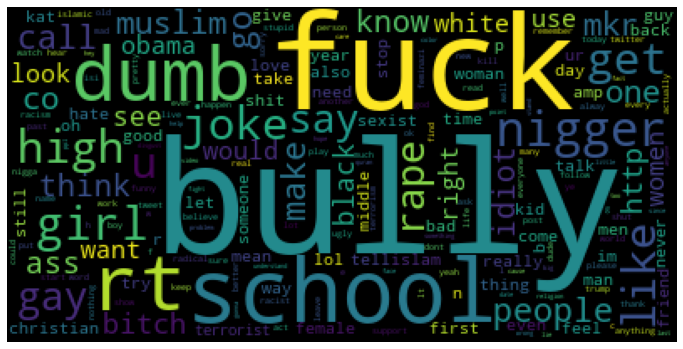

In [113]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['clean_tweet'] = df['tweettext'].apply(clean_text)

text = df['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

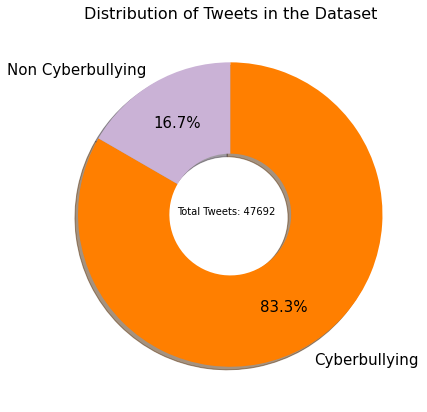

In [114]:
import seaborn as sns
df3 = pd.read_csv('newcleaneddata.csv')
plt.figure(figsize = (7,7))
sorted_counts = df3['cyberbullyingtype'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);


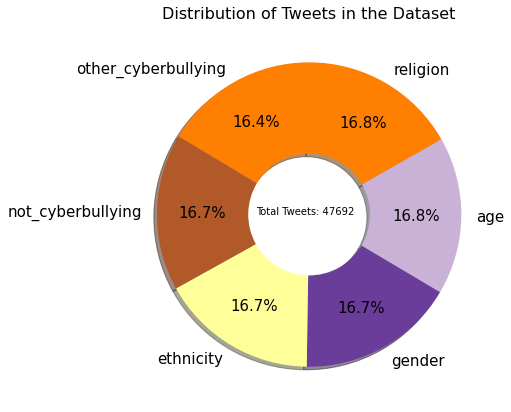

In [115]:
plt.figure(figsize = (7,7))
df4 = pd.read_csv('cyberbullying_tweets.csv')
sorted_counts = df4['cyberbullying_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

How many most common words to print: 30
The 30 most common words are as follows

bully :  10882
school :  9173
fuck :  6766
like :  5960
joke :  5608
get :  5131
high :  5064
dumb :  4977
people :  4671
nigger :  4356
rape :  4328
say :  4149
gay :  4056
u :  4051
make :  3857
call :  3805
go :  3276
co :  3262
one :  3126
http :  3093
amp :  2958
ass :  2817
black :  2794
think :  2600
know :  2564
girl :  2472
mkr :  2470
girls :  2469
bitch :  2443
muslims :  2358


<AxesSubplot:xlabel='Word'>

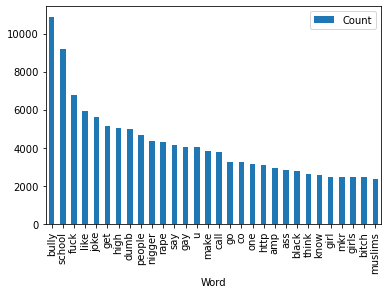

In [116]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file = open('cyberbullyingtweets_1.csv', encoding="utf8")
a= file.read()
wordcount = {}
for word in a.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in wordcount:
                wordcount[word] = 1
        else:
                wordcount[word] += 1
n_print = int(input("How many most common words to print: "))
print("The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
file.close()
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')